In [1]:
import pandas as pd
import scipy as sp
import ast
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Transforming string values to a list
def str_to_list (string):
  string=string.strip().strip("[]")
  string=string.split(",")
  nlist=[float(item.strip().strip("'")) for item in string]
  return nlist


In [59]:
# Direction repetition count
def dir_count (turns):
  up=0
  down=0
  left=0
  right=0
  for i in range (len(turns)):
    for j in range (len(turns[i])):
      if turns[i][j]==0:
        up=up+1
      elif turns[i][j]==1:
        down=down+1
      elif turns[i][j]==2:
        left=left+1
      elif turns[i][j]==3:
        right=right+1
  turn_count=[up,down,left,right]
  return turn_count

In [4]:
def writeincsv (mat,csvfile):
  with open(csvfile, 'w', newline='') as database:
    writer = csv.writer(database)
    writer.writerows(mat)

In [60]:
# funcion principal
def txt_import (url,file_n):
  with open(url, 'r') as file:
    for line in file:
        key, value = line.strip().split(',', 1)
        if key.strip() == 'game_mode':
            game_mode = value
        elif key.strip() == 'player1_ID':
            player1_id = value
        elif key.strip() == 'total_game_time':
            total_game_time = value
            total_game_time=str_to_list(total_game_time)
            total_game_time=np.sum(total_game_time)
        elif key.strip() == 'cookie_winner':
            cookie_winner = value
            cookie_winner=str_to_list(cookie_winner)
            cw1=0
            cw2=0
            for i in cookie_winner:
              if i ==1:
                cw1 += 1
              elif i==2:
                cw2 +=1
        elif key.strip() == 'player1_turns':
            player_1_turns = value
            player_1_turns = ast.literal_eval(player_1_turns)
            p1_turns=dir_count(player_1_turns)
            p1_up=p1_turns[0]
            p1_down=p1_turns[1]
            p1_left=p1_turns[2]
            p1_right=p1_turns[3]
    p1_mov=p1_up+p1_down+p1_left+p1_right
    p1_corr_rat=86/p1_mov
    extra_up=p1_up-22
    extra_down=p1_down-22
    extra_left=p1_left-21
    extra_right=p1_right-21
    p1_mat=[player1_id,game_mode,total_game_time,cw1,p1_up,p1_down,p1_left,p1_right,p1_mov,p1_corr_rat,extra_up,extra_down,extra_left,extra_right]
    dat=np.array(p1_mat)
    df=pd.DataFrame(dat)
    df=np.transpose(df)
    df.to_csv(file_n, mode='a', header=False, index=False)

In [61]:
file_path="/content/drive/MyDrive/Colab Notebooks/txt_files/" # en esta linea cambiar por el directorio de los archivos txt
file_names=os.listdir(file_path)
labels=["Player id","Game Mode","Game Time","Number of Wins","Up","Down","Left","Right","Total Commands", "Correct Commands Ratio","Incorrect up","Incorrect Down", "Incorrect Left", "Incorrect Right"]
with open('result_database.csv', 'w', newline='') as database:
    writer = csv.writer(database)
    writer.writerow(labels)
for i in file_names:
  url=file_path+i
  data=txt_import(url,'result_database.csv')

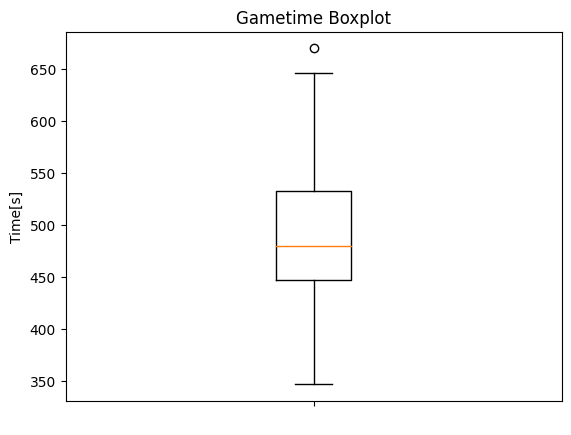

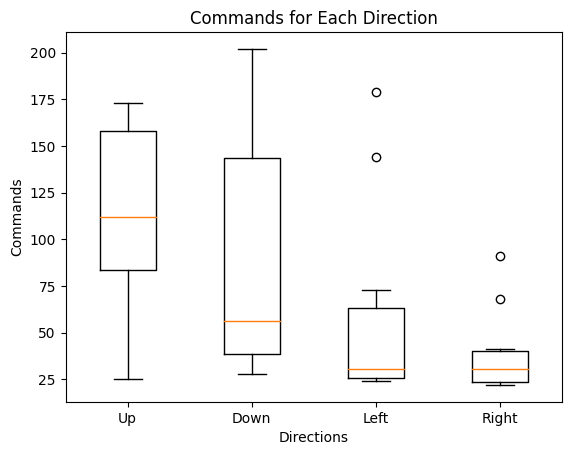

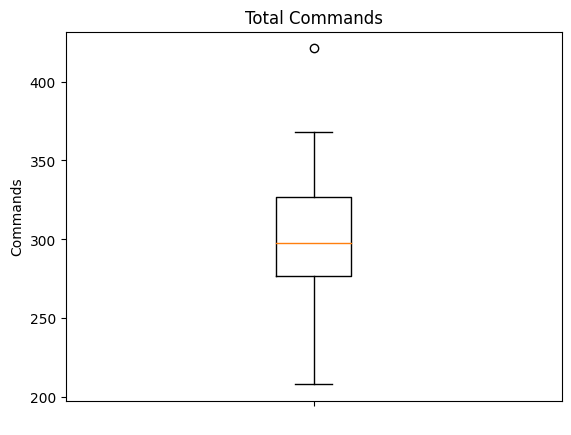

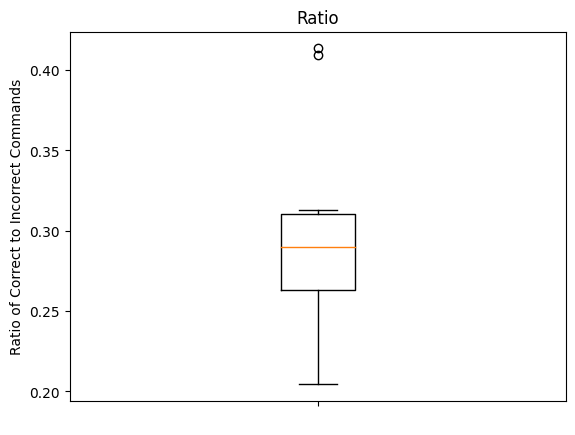

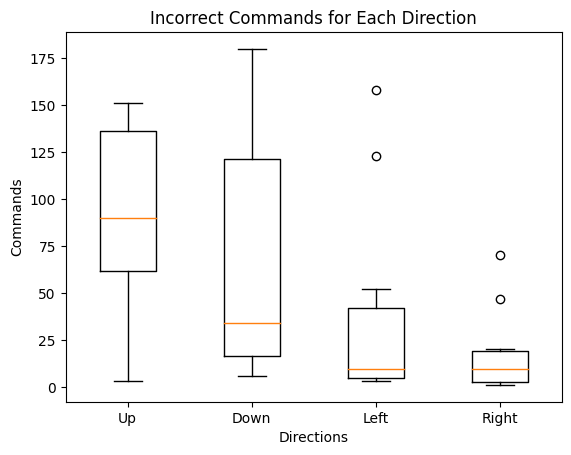

In [62]:
r_data=pd.read_csv("/content/result_database.csv", sep=",")
r_data.head()
df_data=r_data.to_numpy()
plt.boxplot(df_data[:,2],labels=' ')
plt.ylabel("Time[s]")
plt.title("Gametime Boxplot")
plt.show()

plt.boxplot(df_data[:,4:8],labels=["Up","Down","Left","Right"])
plt.ylabel("Commands")
plt.xlabel("Directions")
plt.title("Commands for Each Direction")
plt.show()

plt.boxplot(df_data[:,8],labels=' ')
plt.ylabel("Commands")
plt.title("Total Commands")
plt.show()

plt.boxplot(df_data[:,9],labels=' ')
plt.ylabel("Ratio of Correct to Incorrect Commands")
plt.title("Ratio")
plt.show()

plt.boxplot(df_data[:,10:14],labels=["Up","Down","Left","Right"])
plt.ylabel("Commands")
plt.xlabel("Directions")
plt.title("Incorrect Commands for Each Direction")
plt.show()
